In [3]:
%matplotlib inline


# Ejercicio de Manifold Learning: Proyecto Aceite de Oliva

### Aprendizaje máquina II (Curso 2023-2024)


### Nombre y apellidos: 

### 1.- Carga de datos.

Carga el conjunto de datos **olive.csv**. Este conjunto de datos clasifica diferentes tipos de aceites de oliva italianos en regiones (3 grupos) y áreas (9 grupos) en función de su composición. Separa el conjunto de datos en *X*, *y3* y *y9*.

In [118]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as tls
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from pandas import read_csv 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D



In [2]:
path_olives = './data/olive.csv'
dataframe = pd.read_csv(path_olives)
dataframe.head(7)

,class,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,952,49,254,7795,780,50,75,41
1,North-Apulia,1,1,1036,59,235,7868,661,30,62,44
2,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
3,North-Apulia,1,1,995,46,288,7806,679,56,86,40
4,North-Apulia,1,1,1155,98,201,7606,816,32,60,29
5,North-Apulia,1,1,922,66,264,7990,618,49,56,29
6,Calabria,1,2,1296,136,260,7380,780,48,51,18


In [3]:
'''
Dividimos los datos en tres grupos. Uno con las propiedades de los
aceites, otro con la región de procedencia y otro con el área de
procedencia.
'''

X   = dataframe.drop(['class', 'Region', 'Area'], axis = 1)
y3  = dataframe['Region']
y3_categories =[str(i) for i in y3]
y9  = dataframe['Area']
y9_categories =[str(i) for i in y9]

In [4]:
print("Dimensiones de X: ", X.shape)
print("Dimensiones de y3:", y3.shape)
print("Dimensiones de y9:", y9.shape)

Dimensiones de X:  (572, 8)
Dimensiones de y3: (572,)
Dimensiones de y9: (572,)


### 2.- Visualización de los datos.

- Utilizando los algoritmos t-SNE y UMAP vistos en clase, realiza una visualización de los datos en 2D y en 3D (utiliza la librería plotly para la representación 3D) coloreando los puntos con `labels3` y `labels9`. En UMAP, utiliza la versión no supervisada.
- Varía los parámetros de perplexity y n_neighbors según consideres y comenta qué valores has escogido y porqué.
- Comenta los gráficos y compara los resultados en función del valor de KL obtenido (en t-SNE). 


### 2.1 Visualización 2D y 3D de los datos con t-SNE y UMAP

In [55]:
# si n_jobs= 1 se desactiva el paralelismo
# si n_jobs=-1 se activa el paralelismo
# activar el paralelismo rompe el determinismo de random state de UMAP
umap_instance = umap.UMAP(n_jobs= 1)
# umap_instance = umap.UMAP(n_jobs=-1)

#TSNE
tsne_2d  = TSNE(n_components=2,     # 2D embedding
                random_state=42, 
                perplexity=30,    
                metric="euclidean",
                verbose=True       # no output
                )      

X_tsne_2d = tsne_2d.fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 572 samples in 0.001s...
[t-SNE] Computed neighbors for 572 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 572 / 572
[t-SNE] Mean sigma: 62.042635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.264114
[t-SNE] KL divergence after 1000 iterations: 0.311541


In [56]:

#UMAP
umap_2d = umap.UMAP(n_components=2,  # 2D embedding
                    random_state=42,
                    n_neighbors=10,
                    verbose=True   # no output
                    )

X_umap_2d = umap_2d.fit_transform(X)


UMAP(n_neighbors=10, random_state=42, verbose=True)
Mon Mar  4 21:24:02 2024 Construct fuzzy simplicial set
Mon Mar  4 21:24:02 2024 Finding Nearest Neighbors
Mon Mar  4 21:24:02 2024 Finished Nearest Neighbor Search
Mon Mar  4 21:24:02 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Mar  4 21:24:03 2024 Finished embedding


In [57]:
tsne_2d_df = pd.DataFrame(X_tsne_2d, columns=['Característica 1', 'Característica 2'])
umap_2d_df = pd.DataFrame(X_umap_2d, columns=['Característica 1', 'Característica 2'])

A partir de nuestras variables descriptivas (las primeras 8 almacenadas en X) reconstruimos nuestros datos con TSNE y UMAP. Hameos mapeados bidimensionales para poder representar los datos. Podríamos también aumentar el número de componentes y limitarnos a representar 2 o 3 de ellas.

In [58]:
tsne_2d_df['Región'] = y3_categories
tsne_2d_df['Área']   = y9_categories
tsne_2d_df

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_tsne = px.scatter(tsne_2d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      color= 'Región', 
                      symbol= 'Área',
                      title='Visualización T-SNE en 2D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_tsne.update_layout(
    autosize=True, 
    width=700, 
    height=500,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_tsne.show()

In [9]:
%%capture
# Representación alternativa no interaccionable
'''
tsne_2d_df['Región'] = y3_categories
tsne_2d_df['Área']   = y9_categories

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font='sans-serif',
              font_scale=1,
              color_codes=True)

# Crear un gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=tsne_2d_df, x='Característica 1', y='Característica 2', hue='Región', style='Área')

# Cambiar el título de la leyenda
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:], labels=labels[1:], title="Región")
scatter.set_title('Visualización t-SNE en 2D')
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)

# Mostrar el gráfico
plt.show()

'''

In [59]:
umap_2d_df['Región'] = y3_categories
umap_2d_df['Área']   = y9_categories
umap_2d_df

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_umap = px.scatter(umap_2d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      color= 'Región', 
                      symbol= 'Área',
                      title='Visualización UMAP en 2D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_umap.update_layout(
    autosize=True, 
    width=700, 
    height=500,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_umap.show()

Podemos representar los datos transformados por UMSP y T-SNE en 2 plots cada uno, de forma que separemos región y área en gráficos distintos:

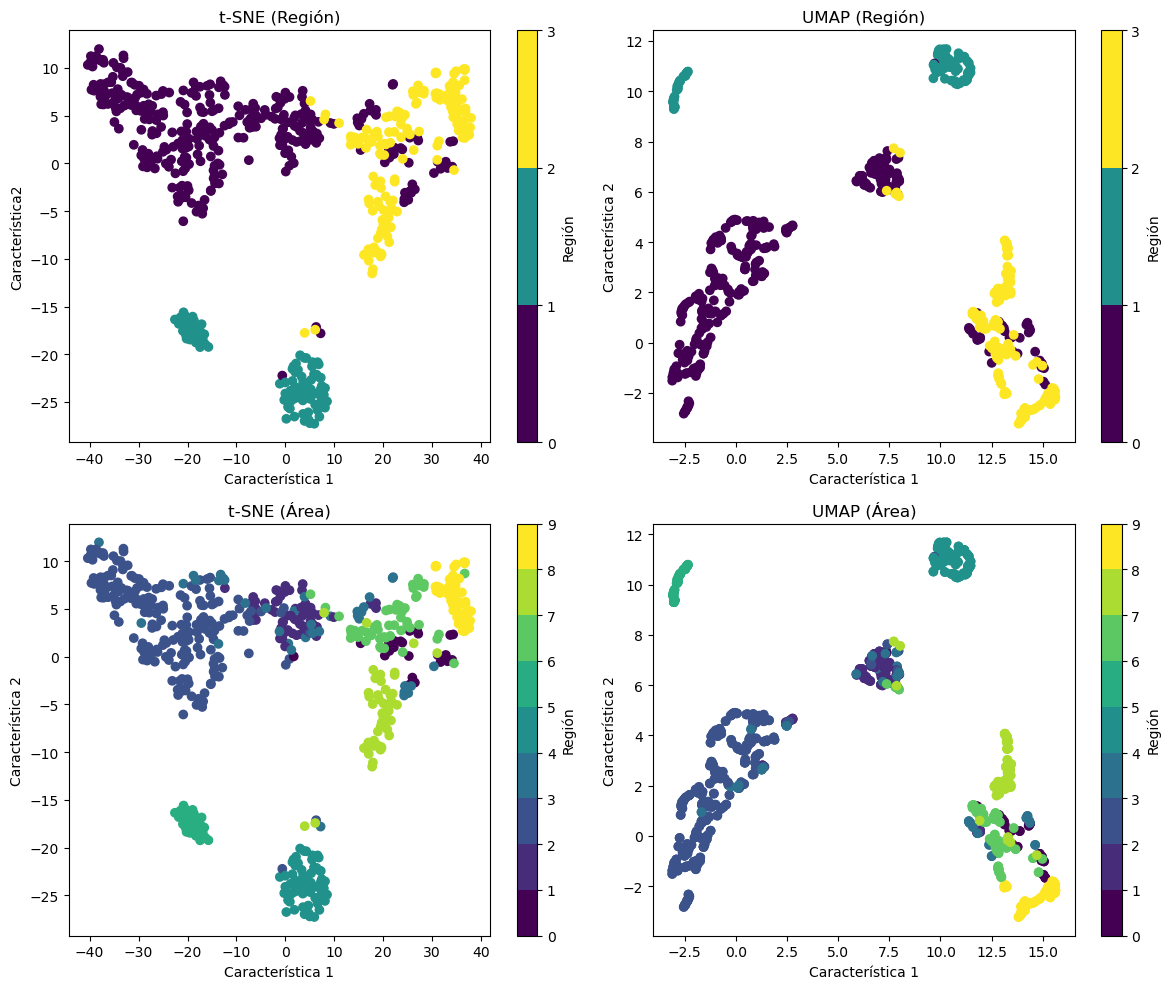

In [60]:
# Crear una figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

cmap = plt.get_cmap('viridis')

bounds_reg = [0, 1, 2, 3]
bounds_are = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

norm_reg = mcolors.BoundaryNorm(points_reg, cmap.N)
norm_are = mcolors.BoundaryNorm(bounds_are, cmap.N)

# Scatter plot de t-SNE con y3
axs[0, 0].scatter(tsne_2d_df['Característica 1'], tsne_2d_df['Característica 2'], c=y3, cmap='viridis')
axs[0, 0].set_title('t-SNE (Región)')
axs[0, 0].set_xlabel('Característica 1')
axs[0, 0].set_ylabel('Característica2')
scat_t_reg = axs[0, 0].scatter([], [], c=[], cmap='viridis', norm=norm_reg)
fig.colorbar(scat_t_reg, ax=axs[0, 0], label='Región', ticks=bounds_reg)

# Scatter plot de UMAP con y3
axs[0, 1].scatter(umap_2d_df['Característica 1'], umap_2d_df['Característica 2'], c=y3, cmap='viridis')
axs[0, 1].set_title('UMAP (Región)')
axs[0, 1].set_xlabel('Característica 1')
axs[0, 1].set_ylabel('Característica 2')
scat_t_reg = axs[0, 1].scatter([], [], c=[], cmap='viridis', norm=norm_reg)
fig.colorbar(scat_t_reg, ax=axs[0, 1], label='Región', ticks=bounds_reg)

# Scatter plot de t-SNE con y9
axs[1, 0].scatter(tsne_2d_df['Característica 1'], tsne_2d_df['Característica 2'], c=y9, cmap='viridis')
axs[1, 0].set_title('t-SNE (Área)')
axs[1, 0].set_xlabel('Característica 1')
axs[1, 0].set_ylabel('Característica 2')
scat_t_are = axs[1, 0].scatter([], [], c=[], cmap='viridis', norm=norm_are)
fig.colorbar(scat_t_are, ax=axs[1, 0], label='Región', ticks=bounds_are)

# Scatter plot de UMAP con y9
axs[1, 1].scatter(umap_2d_df['Característica 1'], umap_2d_df['Característica 2'], c=y9, cmap='viridis')
axs[1, 1].scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y9, cmap='viridis')
axs[1, 1].set_title('UMAP (Área)')
axs[1, 1].set_xlabel('Característica 1')
axs[1, 1].set_ylabel('Característica 2')
scat_t_are = axs[1, 1].scatter([], [], c=[], cmap='viridis', norm=norm_are)
fig.colorbar(scat_t_are, ax=axs[1, 1], label='Región', ticks=bounds_are)

plt.tight_layout()
plt.show()

Paral la etiqueta `Region`, tanto t-SNE como UMAP, son capaces de separar relativamente bien en clusters los distintos tipos de aceite, con solo unas pocas muestras solapadas. Tal vez seamos capaces de separarlas mejor aplicando los mismos algoritmos con `n_components = 3`. El modelo `UMAP` es capaz de agrupar los datos de forma menos dispersa (concentra más las clases en cada cluster).

Para la etiqueta `Area`, las salidas son similares. Los distintos tipos de aceite según el área no están siendo separados correctamente y el solape es bastante alto.

#### Representación 3D:

In [61]:
#TSNE
tsne_3d  = TSNE(n_components=3,     # 3D embedding
                random_state=42, 
                perplexity=30,    
                metric="euclidean",
                verbose=True       # no output
                )      

X_tsne_3d = tsne_3d.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 572 samples in 0.001s...
[t-SNE] Computed neighbors for 572 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 572 / 572
[t-SNE] Mean sigma: 62.042635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.707447
[t-SNE] KL divergence after 1000 iterations: 0.229864


In [62]:
#UMAP
umap_3d = umap.UMAP(n_components=3,  # 3D embedding
                    random_state=42,
                    n_neighbors=10,
                    verbose=True   # no output
                    )

X_umap_3d = umap_3d.fit_transform(X)

UMAP(n_components=3, n_neighbors=10, random_state=42, verbose=True)
Mon Mar  4 21:36:21 2024 Construct fuzzy simplicial set
Mon Mar  4 21:36:21 2024 Finding Nearest Neighbors
Mon Mar  4 21:36:21 2024 Finished Nearest Neighbor Search
Mon Mar  4 21:36:21 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Mar  4 21:36:22 2024 Finished embedding


In [63]:
tsne_3d_df = pd.DataFrame(X_tsne_3d, columns=['Característica 1', 'Característica 2', 'Característica 3'])
umap_3d_df = pd.DataFrame(X_umap_3d, columns=['Característica 1', 'Característica 2', 'Característica 3'])

In [79]:
tsne_3d_df['Región'] = y3_categories
tsne_3d_df['Área']   = y9_categories
tsne_3d_df['size']   = 10  # tamaño de los puntos

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_tsne_3d = px.scatter_3d(tsne_3d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      z='Característica 3',
                      color= 'Región', 
                      symbol= 'Área',
                      size='size',  # Usar la nueva columna 'size' para determinar el tamaño de los puntos
                      title='Visualización T-SNE en 3D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_tsne_3d.update_layout(
    autosize=True, 
    width=850, 
    height=850,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_tsne_3d.show()

In [82]:
umap_3d_df['Región'] = y3_categories
umap_3d_df['Área']   = y9_categories
umap_3d_df['size']   = 10  # tamaño de los puntos

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_umap_3d = px.scatter_3d(umap_3d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      z='Característica 3',
                      color= 'Región', 
                      symbol= 'Área',
                      size='size',  # Usar la nueva columna 'size' para determinar el tamaño de los puntos
                      title='Visualización T-SNE en 3D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_umap_3d.update_layout(
    autosize=True, 
    width=850, 
    height=750,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_umap_3d.show()

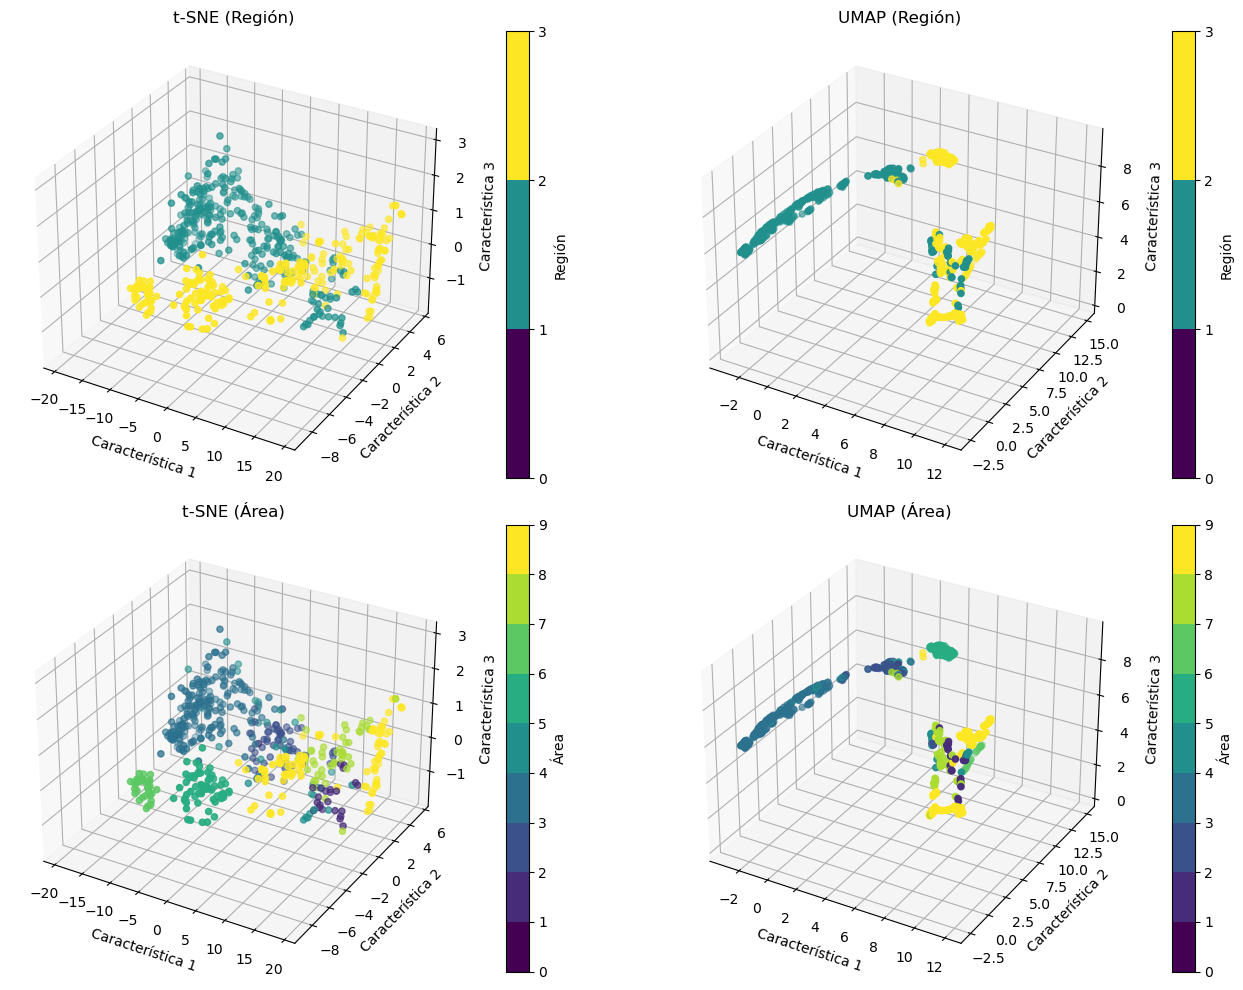

In [117]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura con 4 subplots
fig = plt.figure(figsize=(14, 10))

cmap = plt.get_cmap('viridis')

bounds_reg = [0, 1, 2, 3]
bounds_are = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

norm_reg = mcolors.BoundaryNorm(bounds_reg, cmap.N)
norm_are = mcolors.BoundaryNorm(bounds_are, cmap.N)

# Scatter plot 3D de t-SNE con y3
ax = fig.add_subplot(2, 2, 1, projection='3d')
scat_t_reg = ax.scatter(tsne_3d_df['Característica 1'], tsne_3d_df['Característica 2'], tsne_3d_df['Característica 3'], c=y3, cmap='viridis', norm=norm_reg)
ax.set_title('t-SNE (Región)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_t_reg, ax=ax, label='Región', ticks=bounds_reg, pad=0.07)

# Scatter plot 3D de UMAP con y3 
ax = fig.add_subplot(2, 2, 2, projection='3d')
scat_u_reg = ax.scatter(umap_3d_df['Característica 1'], umap_3d_df['Característica 2'], umap_3d_df['Característica 3'], c=y3, cmap='viridis', norm=norm_reg)
ax.set_title('UMAP (Región)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_u_reg, ax=ax, label='Región', ticks=bounds_reg, pad=0.07)

# Scatter plot 3D de t-SNE con y9
ax = fig.add_subplot(2, 2, 3, projection='3d')
scat_t_are = ax.scatter(tsne_3d_df['Característica 1'], tsne_3d_df['Característica 2'], tsne_3d_df['Característica 3'], c=y9, cmap='viridis', norm=norm_are)
ax.set_title('t-SNE (Área)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_t_are, ax=ax, label='Área', ticks=bounds_are, pad=0.07)

# Scatter plot 3D de UMAP con y9
ax = fig.add_subplot(2, 2, 4, projection='3d')
scat_u_are = ax.scatter(umap_3d_df['Característica 1'], umap_3d_df['Característica 2'], umap_3d_df['Característica 3'], c=y9, cmap='viridis', norm=norm_are)
ax.set_title('UMAP (Área)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_u_are, ax=ax, label='Área', ticks=bounds_are, pad=0.07)

plt.tight_layout()
plt.show()

### 3.- Reducción de la dimensionalidad.

Realiza un estudio para averiguar la dimensionalidad intrínseca del dataset.

### 4.- Reducción de la dimensionalidad y clasificación de los aceites en Regions y Areas.

- Separa el conjunto de datos en train (70%) y test (30%).
- Reduce la dimensionalidad del dataset utilizando los métodos espectrales vistos en clase. Investiga qué valor de número de vecinos es el más adecuado para el número de componentes que consideres adecuado en función del estudio de la dimensionalidad intrínseca.
- Elige el algoritmo de clasificación que consideres oportuno para resolver un problema de este tipo y aplícalo a estos datos.
- ¿Qué algoritmo de reducción de la dimensionalidad obtiene el mejor score para clasificar los datos en regiones? ¿Y en áreas? ¿Es el procedimiento más rápido en términos de tiempo de ejecución? Realiza una tabla con el rendimiento de la clasificación de cada algoritmo de reducción de dimensionaidad y el tiempo de ejecución.

In [ ]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

#### 4.1 Clasificación 3 grupos

#### 4.2 Clasificación 9 grupos